In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("Housing.csv")

In [113]:
data.head()
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
512,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
513,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
514,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
515,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
516,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [60]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [64]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [65]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [67]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

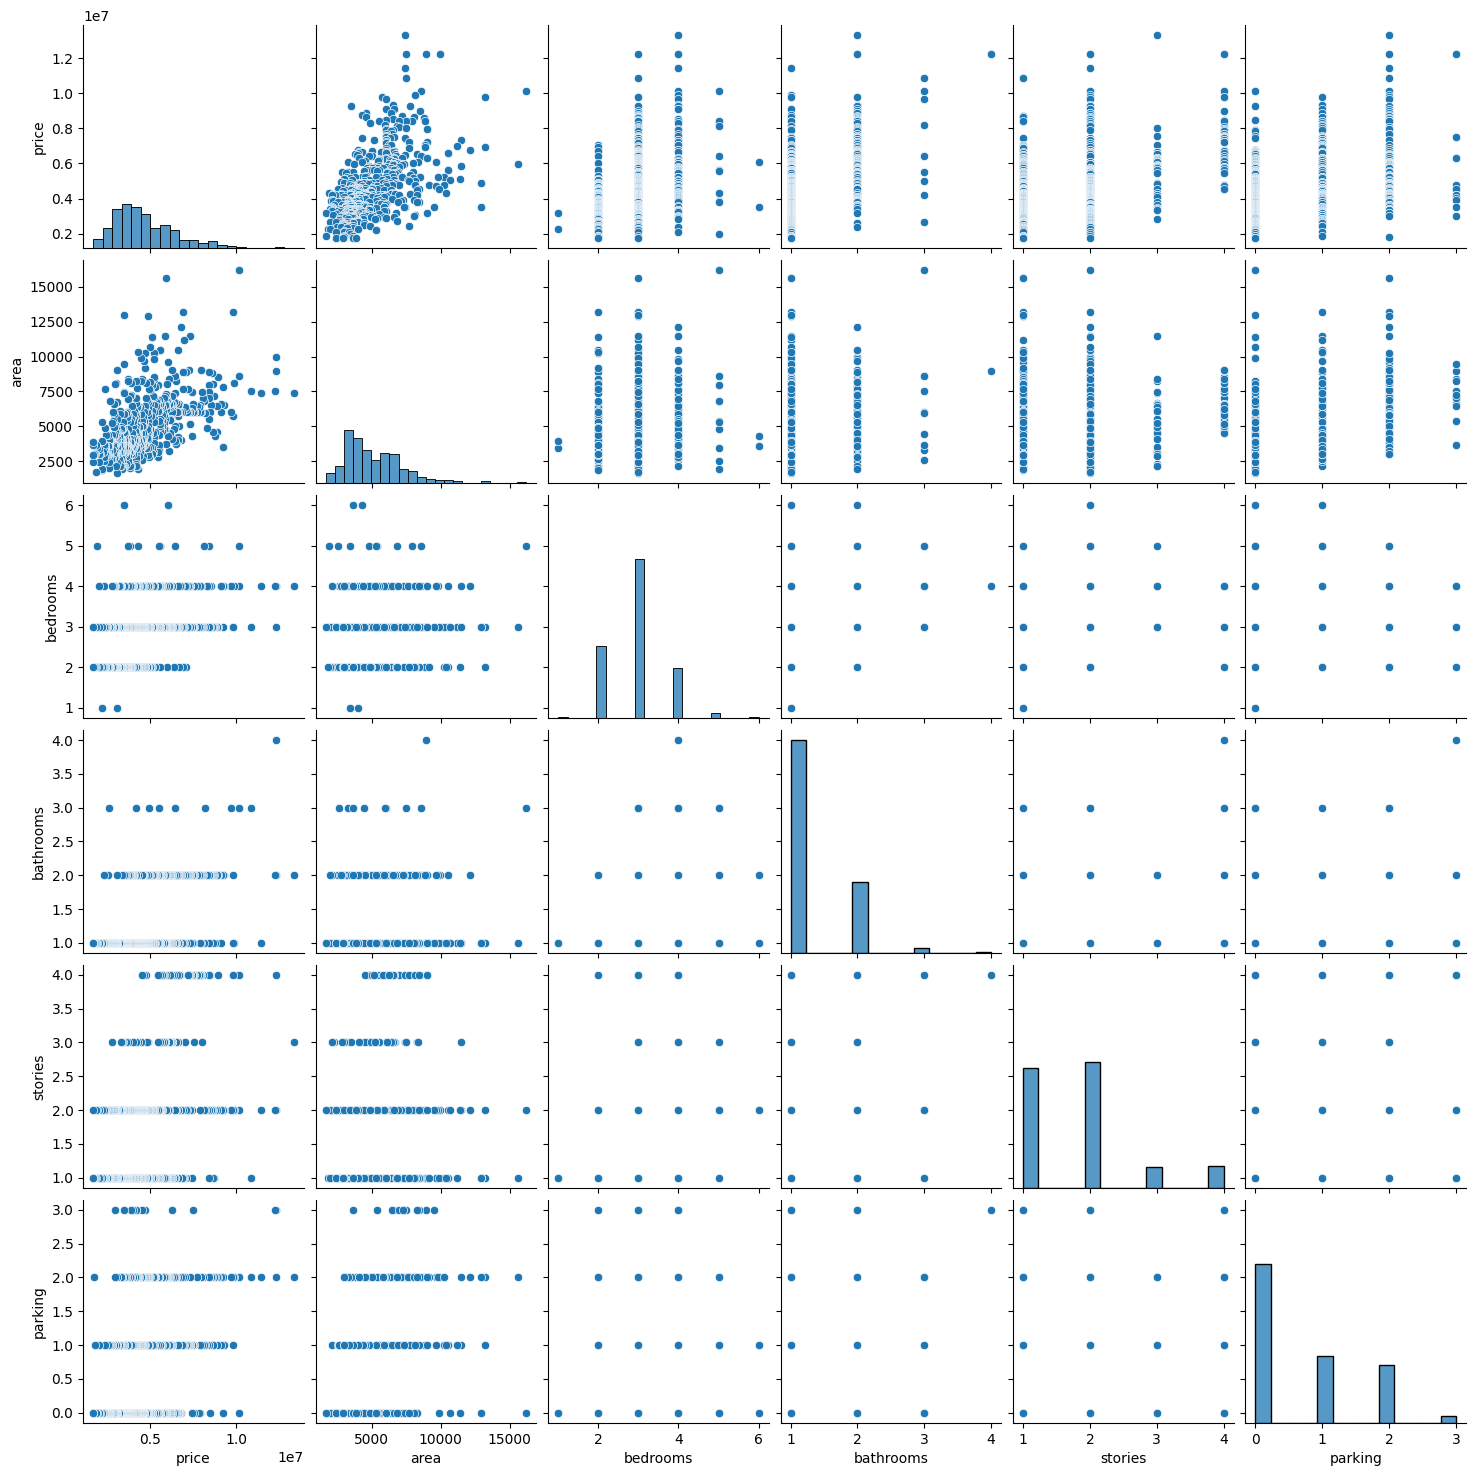

In [66]:
sns.pairplot(data)

In [86]:
data.corr(method='pearson', numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


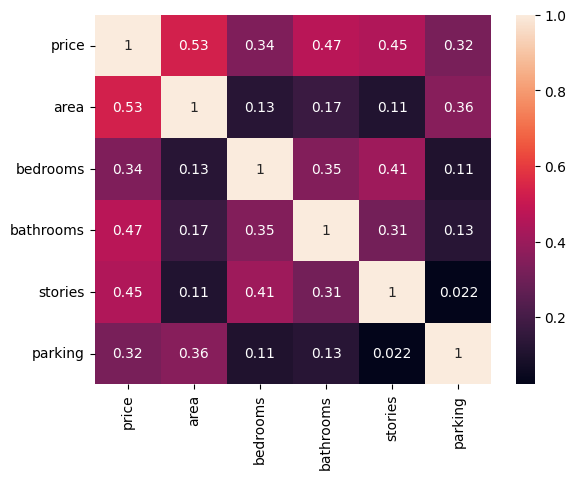

In [117]:
correl=data.corr(method='pearson',numeric_only=True)
sns.heatmap(correl, annot=True)
plt.show()

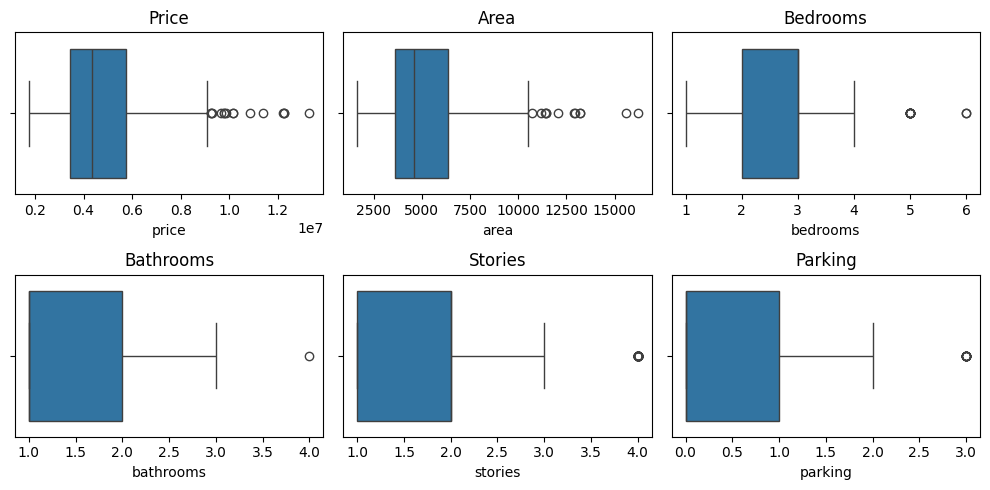

In [87]:
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
fig, axs = plt.subplots(2, 3, figsize = (10, 5))

for i, attr in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data = data[attr], ax = axs[row, col], orient = 'h')
    axs[row, col].set_title(attr.capitalize())

plt.tight_layout()
plt.show()


In [88]:
q3, q2, q1 = np.percentile(data['price'], [75, 50, 25])

iqr = q3 - q1
iqr3 = q3 + 1.5 * iqr
iqr1 = q1 - 1.5 * iqr

print("Interquartile range =", iqr, "\nLower range =", iqr1, "\nUpper range =", iqr3)


Interquartile range = 2310000.0 
Lower range = -35000.0 
Upper range = 9205000.0


In [89]:
data = data[data['price'] <= 9205000.0]

In [90]:
q3, q2, q1 = np.percentile(data['area'], [75, 50, 25])

iqr = q3 - q1
iqr3 = q3 + 1.5 * iqr
iqr1 = q1 - 1.5 * iqr

print("Interquartile range =", iqr, "\nLower range =", iqr1, "\nUpper range =", iqr3)


Interquartile range = 2768.25 
Lower range = -604.875 
Upper range = 10468.125


In [91]:
data = data[data['area'] <= 10468.125]


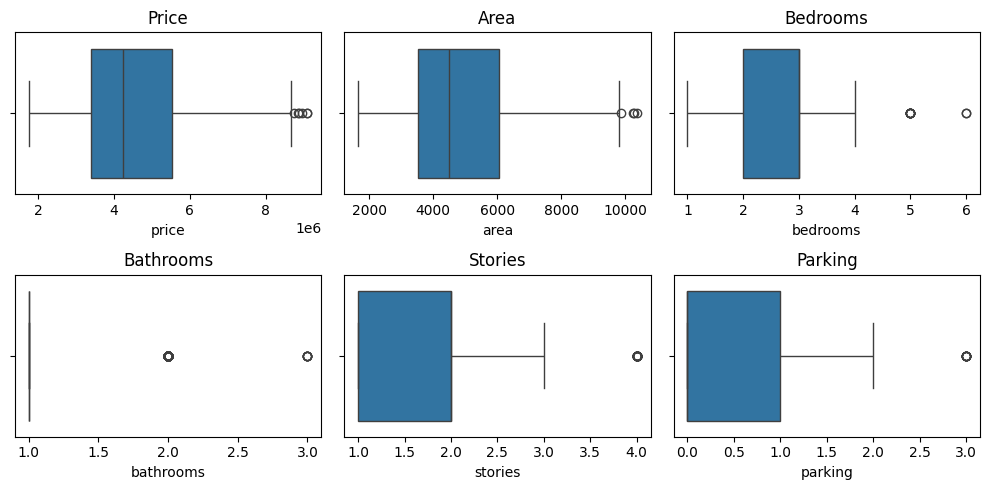

In [93]:
data.reset_index(drop = True, inplace = True)
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
fig, axs = plt.subplots(2, 3, figsize = (10, 5))

for i, attr in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data = data[attr], ax = axs[row, col], orient = 'h')
    axs[row, col].set_title(attr.capitalize())

plt.tight_layout()
plt.show()


In [94]:
data.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [95]:
d={"area":data["area"],"bedrooms":data["bedrooms"],"bathrooms":data["bathrooms"],"price":data["price"]}
dataset=pd.DataFrame(data=d)

In [96]:
dataset.shape

(517, 4)

In [97]:
dataset

,area,bedrooms,bathrooms,price
0,6000,4,1,9100000
1,6600,4,2,9100000
2,8500,3,2,8960000
3,4600,3,2,8890000
4,6420,3,2,8855000
...,...,...,...,...
512,3000,2,1,1820000
513,2400,3,1,1767150
514,3620,2,1,1750000
515,2910,3,1,1750000


In [105]:
np.random.seed(0)

from sklearn.model_selection import train_test_split

X=dataset.drop(["price"], axis=1)
Y=dataset["price"]


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
predictions = model.predict(X_test)

In [109]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
r2

0.5159834086397392

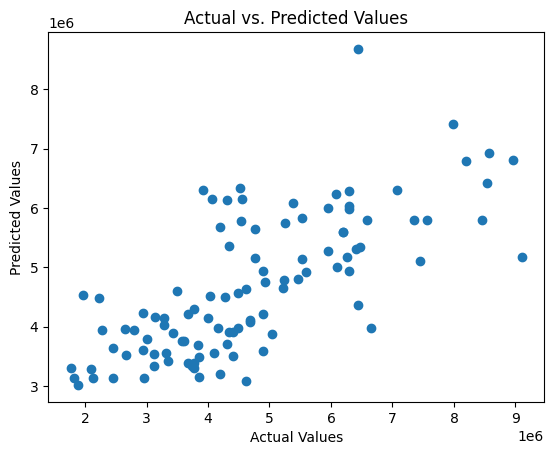

In [110]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [111]:
model.coef_

array([4.07212006e+02, 4.08163496e+05, 1.02294632e+06])

Text(0.5, 1.0, 'Actual vs. Predicted Values')

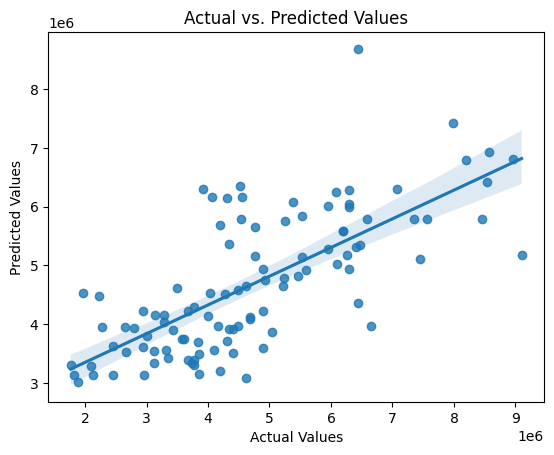

In [112]:
import seaborn as sns  #to plot graphs
sns.regplot(x=y_test,y=predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")